In [160]:
import pandas as pd
import pyodbc as db
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
con = db.connect('Trusted_Connection=yes', driver = '{ODBC Driver 13 for SQL Server}',server = 'localhost\SQLEXPRESS01', database = 'ctwc')

In [162]:
rain_df = pd.read_sql('select * from rain_data', con)
storage_df = pd.read_sql('select * from dam_data', con)

In [163]:
rain_df.head()

,Date,Name,PrecipitationMM
0,1974-10-01,ASSEGAAIBOS,0.00
1,1974-10-01,KOGEL_BAAI,114.10
2,1974-10-01,BERGDUMP,6.27
3,1974-10-01,HIGGOVALE,80.00
4,1974-10-01,JONKERSHOEK,182.60


In [164]:
storage_df.head()

,Date,DamName,StorageML,HeightM
0,2012-01-01,WEMMERSHOEK,44621.0,48.2
1,2012-01-01,STEENBRAS LOWER,23549.0,20.3
2,2012-01-01,STEENBRAS UPPER,29620.0,24.2
3,2012-01-01,VOLELVLEI,124100.0,15.0
4,2012-01-01,HELY-HUTCHINSON,763.0,14.2


In [165]:
storage_df = storage_df[storage_df['StorageML'].notna()].copy()

In [223]:
def dates(df):
    df['date'] = df['Date'].apply(lambda x: pd.to_datetime(x))
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

In [224]:
dates(storage_df)
dates(rain_df)

In [226]:
storage_df.head()

,Date,DamName,StorageML,HeightM,date,month,year,day
0,2012-01-01,WEMMERSHOEK,44621.0,48.2,2012-01-01,1,2012,1
1,2012-01-01,STEENBRAS LOWER,23549.0,20.3,2012-01-01,1,2012,1
2,2012-01-01,STEENBRAS UPPER,29620.0,24.2,2012-01-01,1,2012,1
3,2012-01-01,VOLELVLEI,124100.0,15.0,2012-01-01,1,2012,1
4,2012-01-01,HELY-HUTCHINSON,763.0,14.2,2012-01-01,1,2012,1


In [409]:
def merging(df_x, df_y, group, column_x, column_y, shift = 0):
    
    x = df_x.groupby(group)[[column_x]].mean().shift()
    y = df_y.groupby(group)[[column_y]].mean().diff()
    merge = pd.merge(x,y,how = 'inner', on = group)
    return merge

In [410]:
merged = merging(rain_df, storage_df, 'month', 'PrecipitationMM', 'StorageML',1)

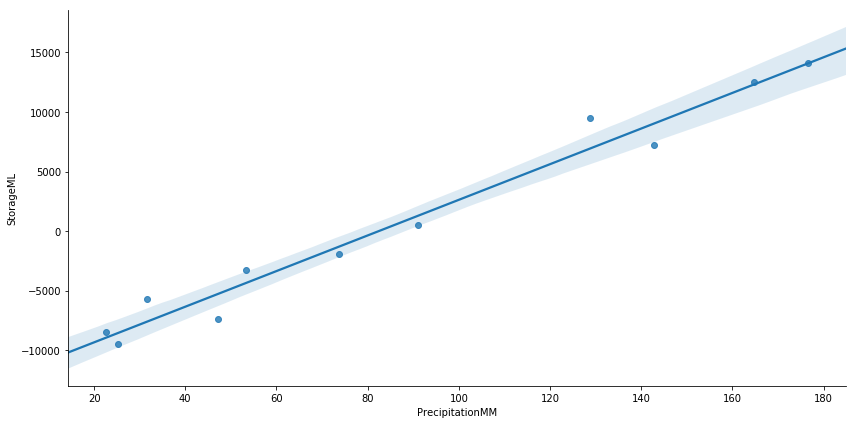

In [411]:
sns.lmplot(x = 'PrecipitationMM', y = 'StorageML', data = merged, height = 6, aspect = 2)
plt.savefig('fig.png')

In [402]:
merged.head()

,PrecipitationMM,StorageML
date,,
2012-01-01,37.439231,NaN
2012-02-01,13.871538,-304.571429
2012-03-01,15.333846,-198.714286
2012-04-01,32.624615,-38.000000
2012-05-01,97.228462,-93.428571


In [412]:
def subplots_db(df, column_1,label_1, column_2, label_2,  title_):    
    fig, ax = plt.subplots(figsize = [24,8])
    plt.plot(df[column_1], label = label_1)
    plt.legend(loc=2)
    ax.tick_params('vals')

    plt.gca().set_title(title_)

    ax2 = ax.twinx()
    plt.plot(df[column_2], 'orange', label = label_2)
    plt.legend(loc=1)
    ax.tick_params('vals')
    plt.savefig('water_storage_rain.png')

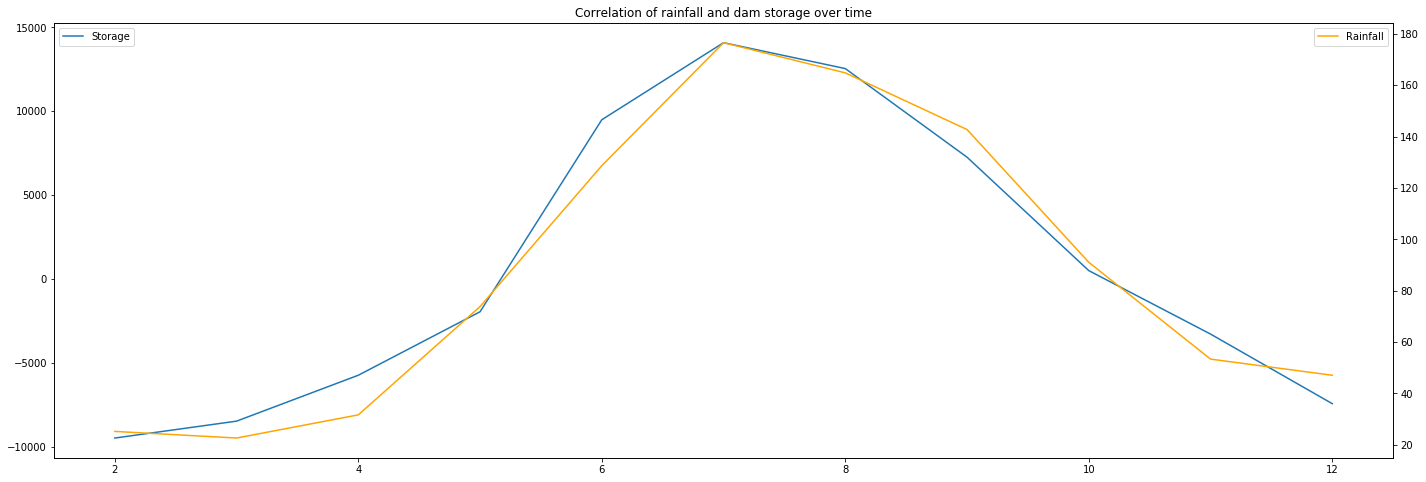

In [413]:
subplots_db(merged,'StorageML', 'Storage', 'PrecipitationMM', 'Rainfall', 'Correlation of rainfall and dam storage over time')

In [270]:
mask = (rain_df['date'] > '2012-01-01') & (rain_df['date'] <= '2018-12-31')

In [414]:
storage_df.head()

,Date,DamName,StorageML,HeightM,date,month,year,day
0,2012-01-01,WEMMERSHOEK,44621.0,48.2,2012-01-01,1,2012,1
1,2012-01-01,STEENBRAS LOWER,23549.0,20.3,2012-01-01,1,2012,1
2,2012-01-01,STEENBRAS UPPER,29620.0,24.2,2012-01-01,1,2012,1
3,2012-01-01,VOLELVLEI,124100.0,15.0,2012-01-01,1,2012,1
4,2012-01-01,HELY-HUTCHINSON,763.0,14.2,2012-01-01,1,2012,1
